In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import os
import time 

train_covid = pd.read_csv(r"/Users/Desktop/COVID_dataset_New.csv")
# feature_new_covid = train_covid.iloc[:,0:11]
new_covid = train_covid.dropna()
print (new_covid)
#Filter missing values
new_covid[new_covid.notnull()]

      Accurate_Episode_Date Case_Reported_Date Test_Reported_Date  \
0                 2020/3/30          2020/3/31          2020/3/31   
1                 2021/1/22          2021/1/24          2021/1/24   
2                 2020/3/24          2020/4/14          2020/4/14   
3                 2021/1/18          2021/1/21          2021/1/21   
4                2020/12/26         2020/12/28         2020/12/28   
...                     ...                ...                ...   
14855              2020/4/2           2020/4/3           2020/4/4   
14856             2021/1/25          2021/1/26          2021/1/26   
14857             2020/12/7          2020/12/8          2020/12/8   
14858            2020/11/22         2020/11/24         2020/11/24   
14859             2021/1/20          2021/1/27          2021/1/27   

      Specimen_Date Age_Group Client_Gender Case_AcquisitionInfo  \
0         2020/3/30       70s          MALE                   OB   
1         2021/1/23       50s      

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,2020/3/30,2020/3/31,2020/3/31,2020/3/30,70s,MALE,OB,Stratford,Yes,43.368662,-81.001913,Fatal
1,2021/1/22,2021/1/24,2021/1/24,2021/1/23,50s,FEMALE,NO KNOWN EPI LINK,Newmarket,NO,44.048023,-79.480239,Not Resolved
2,2020/3/24,2020/4/14,2020/4/14,2020/4/13,70s,FEMALE,OB,Toronto,Yes,43.656591,-79.379358,Resolved
3,2021/1/18,2021/1/21,2021/1/21,2021/1/18,<20,MALE,CC,Mississauga,NO,43.647471,-79.708893,Not Resolved
4,2020/12/26,2020/12/28,2020/12/28,2020/12/26,60s,MALE,OB,Windsor,Yes,42.308796,-83.033670,Resolved
...,...,...,...,...,...,...,...,...,...,...,...,...
14855,2020/4/2,2020/4/3,2020/4/4,2020/4/2,90s,FEMALE,NO KNOWN EPI LINK,Whitby,NO,43.898605,-78.940341,Fatal
14856,2021/1/25,2021/1/26,2021/1/26,2021/1/25,<20,MALE,CC,Thorold,NO,43.116537,-79.241220,Not Resolved
14857,2020/12/7,2020/12/8,2020/12/8,2020/12/7,40s,FEMALE,CC,Mississauga,NO,43.647471,-79.708893,Resolved
14858,2020/11/22,2020/11/24,2020/11/24,2020/11/22,20s,UNSPECIFIED,CC,Newmarket,NO,44.048023,-79.480239,Resolved


In [2]:
#convert categorical features to numerical
covid_encoder = OrdinalEncoder()
covid_encoded = covid_encoder.fit_transform(new_covid)
print (covid_encoded)


[[115. 111. 110. ...   9.   9.   0.]
 [316. 309. 306. ...  17.  21.   1.]
 [108. 119. 116. ...  14.  23.   2.]
 ...
 [ 90.  90.  90. ...  13.  18.   2.]
 [ 46.  47.  47. ...  17.  21.   2.]
 [314. 312. 309. ...  13.  18.   1.]]


In [3]:
#sklearn中的StandardScalar(均值方差归一化)
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
standardscaler.fit(covid_encoded)

# #训练数据集和测试数据集都要进行归一化处理
# covid_encoded=standardscaler.transform(covid_encoded)


StandardScaler()

In [4]:
print(covid_encoded)

[[115. 111. 110. ...   9.   9.   0.]
 [316. 309. 306. ...  17.  21.   1.]
 [108. 119. 116. ...  14.  23.   2.]
 ...
 [ 90.  90.  90. ...  13.  18.   2.]
 [ 46.  47.  47. ...  17.  21.   2.]
 [314. 312. 309. ...  13.  18.   1.]]


In [5]:
import torch

Age_Group = ['<20', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
Client_Gender = ['MALE', 'FEMALE', 'GENDER DIVERSE', 'UNSPECIFIED']
Case_AcquisitionInfo = ['CC', 'MISSING INFORMATION', 'NO KNOWN EPI LINK', 'OB', 'TRAVEL', 'UNSPECIFIED EPI LINK']
Reporting_PHU_City = ['Barrie', 'Brantford', 'Belleville', 'Brockville', 'Chatham', 'Cornwall', 'Guelph', 'Hamilton',
                      'Kenora', 'Kingston', 'London', 'Mississauga', 'New Liskeard', 'Newmarket', 'North Bay',
                      'Oakville', 'Ottawa', 'Owen Sound', 'Pembroke', 'Peterborough', 'Point Edward', 'Port Hope',
                      'Sault Ste. Marie', 'Simcoe', 'St. Thomas', 'Stratford', 'Sudbury', 'Thorold', 'Thunder Bay',
                      'Timmins', 'Toronto', 'Waterloo', 'Whitby', 'Windsor']

Labels = {'Fatal': 0, 'Not Resolved': 1, 'Resolved': 2}

TRAIN_VALID_RATIO = 0.8

BATCH = 128

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

state_dict_path = "model_dict11"
learning_rate = 0.0001#0.00001

epochs = 100

save_path = "model_dict12"


In [6]:
import time

from config import *


def get_timestamp(dt):
    timeArray = time.strptime(dt, "%Y-%m-%d")
    timestamp = time.mktime(timeArray)
    return timestamp


def get_onehot(data, mode):
    if mode == "age":
        oh_dict = dict((item, idx) for idx, item in enumerate(Age_Group))
    elif mode == "gender":
        oh_dict = dict((item, idx) for idx, item in enumerate(Client_Gender))
    elif mode == "case":
        oh_dict = dict((item, idx) for idx, item in enumerate(Case_AcquisitionInfo))
    elif mode == "city":
        oh_dict = dict((item, idx) for idx, item in enumerate(Reporting_PHU_City))
    else:
        print("Input error!")
        return

    out = [0.] * len(oh_dict)
    if oh_dict.__contains__(data):
        out[oh_dict[data]] = 1.

    return out


def get_label(data):
    return Labels[data]


In [7]:
from torch.utils.data import Dataset, DataLoader, random_split
import pandas as pd
import torch
import numpy as np

# from utils import get_timestamp, get_onehot, get_label
from config import *


class covid19set(Dataset):
    def __init__(self):
#         self.df = pd.new_covid
#         self.df = new_covid
        self.df = covid_encoded
    def __getitem__(self, idx):
        data = self.df[idx]
        x, label = data[:-1], data[-1]
        x = np.array(x, dtype=np.float32)
        label = np.array(label, dtype=np.long)
        x = torch.tensor(x)
        label = torch.tensor(label)
#         ts1 = get_timestamp(data[0]) if type(data[0]) == str else 0.
#         ts2 = get_timestamp(data[1]) if type(data[1]) == str else 0.
#         ts3 = get_timestamp(data[2]) if type(data[2]) == str else 0.
#         ts4 = get_timestamp(data[3]) if type(data[3]) == str else 0.
#         age_group = get_onehot(data[4], "age")
#         gender = get_onehot(data[5], "gender")
#         case = get_onehot(data[6], "case")
#         city = get_onehot(data[7], "city")
#         outbreak_related = 1. if data[8] == 'Yes' else 0.
#         latitude = float(data[9])
#         longitude = float(data[10])
#         x = torch.tensor([ts1, ts2, ts3, ts4, *age_group, *gender,
#                           *case, *city, outbreak_related, latitude, longitude])
#          label = get_label(data[11])
#         label = torch.tensor(label)
        return x, label



    def __len__(self):
        return len(self.df)


def get_loaders():
    dataset = covid19set()
    set_size = len(dataset)
    train_size = int(0.9 * set_size)
    valid_size = set_size - train_size
    train_set, valid_set = random_split(dataset, [train_size, valid_size])
    train_loader = DataLoader(dataset=train_set, batch_size=BATCH, shuffle=True)
    valid_loader = DataLoader(dataset=valid_set, batch_size=BATCH, shuffle=False)
    return train_loader, valid_loader


In [8]:

import torch
import torch.nn as nn

from config import *


class FCNet(nn.Module):
    def __init__(self, in_ch=11, out_ch=3):
        super(FCNet, self).__init__()

        self.net = nn.Sequential(
            nn.Linear(in_ch, 128),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(128, out_ch),
        )

    def forward(self, x):
        x = self.net(x)
        return x


In [9]:
# train the model
import torch
import torch.nn as nn

# from data import get_loaders
# from model import FCNet
from config import *


def train():
    train_loader, valid_loader = get_loaders()

    # data = iter(train_loader).__next__()

    model = FCNet()
    model.to(device)
    if state_dict_path != None:
        model.load_state_dict(torch.load(state_dict_path))

    criteon = nn.CrossEntropyLoss().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    train_loss = []
    valid_loss = []
    corrct_rate = []
    
    best_acc = 0.
    for epoch in range(epochs):

        model.train()
        train_total_loss, train_avg_loss = 0., 0.
        
        
        for x, label in train_loader:
            optimizer.zero_grad()

            x, label = x.to(device), label.to(device)
            logit = model(x)
            loss = criteon(logit, label)

            loss.backward()
            optimizer.step()
            train_total_loss += loss.item()
        train_avg_loss = train_total_loss / len(train_loader.dataset)

        model.eval()
        pred_correct, valid_total_loss, valid_avg_loss = 0., 0., 0.
        for x, label in valid_loader:
            x, label = x.to(device), label.to(device)
            with torch.no_grad():
                logit = model(x)
                loss = criteon(logit, label)
                pred = logit.argmax(dim=1)
                pred_correct += torch.eq(pred, label).float().sum().item()

                valid_total_loss += loss.item()
        valid_avg_loss = valid_total_loss / len(valid_loader.dataset)
        current_acc = pred_correct / len(valid_loader.dataset)
        
#         train_loss = []
        train_loss.append(train_avg_loss)#save train_avg_loss in the train_loss
        valid_loss.append(valid_avg_loss)#save valid_avg_loss in the valid_loss
        corrct_rate.append(current_acc)#save current_acc in the current_acc

        if current_acc > best_acc:
            torch.save(model.state_dict(), save_path)
        print(f"epoch: {epoch + 1}\t"
              f"train loss: {train_avg_loss}\t"
              f"valid loss: {valid_avg_loss}\t"
              f"corrct rate: {current_acc}")
    return train_loss,valid_loss,corrct_rate

# Run-time performance for training and train the model
if __name__ == '__main__':
    start = time.time()
#     train()
    train_loss,valid_loss,accuracy = train()
    end = time.time()
    print(end-start)


epoch: 1	train loss: 0.0036133863842754054	valid loss: 0.003489306660642396	corrct rate: 0.8334470989761092
epoch: 2	train loss: 0.0035664362940975424	valid loss: 0.003459104254790947	corrct rate: 0.8361774744027304
epoch: 3	train loss: 0.003567464334927683	valid loss: 0.003412546619213482	corrct rate: 0.8361774744027304
epoch: 4	train loss: 0.003643089431137762	valid loss: 0.0034348241298271932	corrct rate: 0.8341296928327645
epoch: 5	train loss: 0.003584596344047665	valid loss: 0.0035391931240875973	corrct rate: 0.8286689419795222
epoch: 6	train loss: 0.00373518561656881	valid loss: 0.0034795335331874494	corrct rate: 0.8327645051194539
epoch: 7	train loss: 0.0036082669188454604	valid loss: 0.0034736918507989357	corrct rate: 0.8334470989761092
epoch: 8	train loss: 0.003635986799718215	valid loss: 0.0034623172299446912	corrct rate: 0.8361774744027304
epoch: 9	train loss: 0.003799484695590804	valid loss: 0.0034350844780332806	corrct rate: 0.8395904436860068
epoch: 10	train loss: 0.00364

epoch: 77	train loss: 0.0036838322572740677	valid loss: 0.003431105918851729	corrct rate: 0.8313993174061434
epoch: 78	train loss: 0.0035723875407065956	valid loss: 0.003426051343260365	corrct rate: 0.8368600682593856
epoch: 79	train loss: 0.003535678039050979	valid loss: 0.0034573987685779664	corrct rate: 0.8327645051194539
epoch: 80	train loss: 0.0035256429766451357	valid loss: 0.003393986648260123	corrct rate: 0.8368600682593856
epoch: 81	train loss: 0.003504501707543918	valid loss: 0.0033992249200775356	corrct rate: 0.8361774744027304
epoch: 82	train loss: 0.0035206185305575147	valid loss: 0.0034101534418685443	corrct rate: 0.8354948805460751
epoch: 83	train loss: 0.0036557661614546417	valid loss: 0.0034790436155560074	corrct rate: 0.8286689419795222
epoch: 84	train loss: 0.0035705717983325414	valid loss: 0.0034539124054306604	corrct rate: 0.8334470989761092
epoch: 85	train loss: 0.0035296253896727	valid loss: 0.00342175142756908	corrct rate: 0.8395904436860068
epoch: 86	train loss

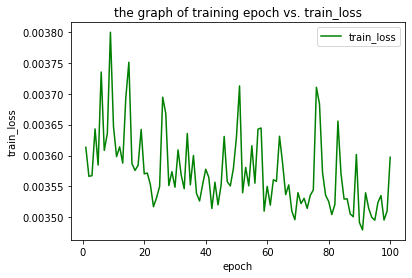

In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#show figure
x = range(1,101,1)

plt.title('the graph of training epoch vs. train_loss')
plt.plot(x, train_loss, color='green', label='train_loss')
# plt.plot(x, valid_loss, color='red', label='valid_loss')
# plt.plot(x, accuracy, color='skyblue', label='accuracy')
plt.legend() # 
plt.xlabel('epoch')
plt.ylabel('train_loss')
plt.show()

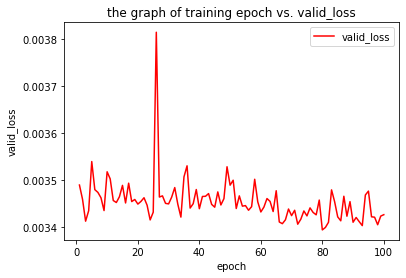

In [11]:
plt.title('the graph of training epoch vs. valid_loss')
plt.plot(x, valid_loss, color='red', label='valid_loss')
plt.legend() # 
plt.xlabel('epoch')
plt.ylabel('valid_loss')
plt.show()

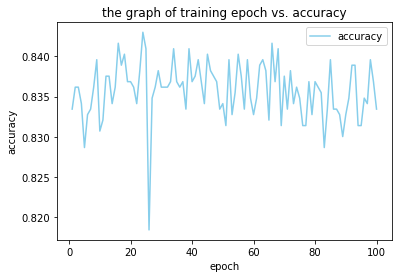

In [12]:
plt.title('the graph of training epoch vs. accuracy')
plt.plot(x, accuracy, color='skyblue', label='accuracy')
plt.legend() # 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [13]:
# #sklearn中的StandardScalar(均值方差归一化)
# from sklearn.preprocessing import StandardScaler
# standardscaler=StandardScaler()
# standardscaler.fit(X_train)

# #训练数据集和测试数据集都要进行归一化处理
# x_train_standard=standardscaler.transform(X_train)
# test_standard=standardscaler.transform(test_heart_feature)